In [2]:
import cv2
from matplotlib import pyplot as plt
from imutils import resize

In [8]:
image = cv2.imread("./images/balloon.jpg", 0)

cv2.imshow("image", image)

k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()
elif k == ord("s"):
    cv2.imwrite("copy.png", image)
    cv2.destroyAllWindows()
    
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [8]:
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    ret, frame = cap.read()
    
    frame = resize(frame, width=1080)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("frame", gray)
        
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [21]:
img = cv2.imread("./images/credit_card.jpg", -1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f"shape: {img.shape}")
print(f"size: {img.size}")
print(f"dtype: {img.dtype}")

b, g, r = cv2.split(img)

cv2.imshow("image", img)

# fig, ax = plt.subplots(1, 3, figsize=(20, 20))

# ax[0].imshow(b)
# ax[1].imshow(g)
# ax[2].imshow(r)
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)

cv2.waitKey()
cv2.destroyAllWindows()

shape: (600, 800, 3)
size: 1440000
dtype: uint8


In [22]:
chip = img[230:300,210:270, :]

img[ 290:360, 480:540, :] = chip
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
img1 = cv2.imread("./images/credit_card.jpg", -1)
img2 = cv2.imread("./images/balloon.jpg", -1)

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
# img = img1 + img2
img = cv2.addWeighted(img1, .7, img2, .3, 3)

cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
import numpy as np

In [26]:
img1 = np.zeros((250, 500, 3)).astype(np.uint8)
img1 = cv2.rectangle(img1, (200,0), (300, 100), (255, 255, 255), -1)

white = np.full((250,250,3), 255)
img2 = np.zeros((250, 500, 3)).astype(np.uint8)
img2[:, 250:, :] = white

bit_and = cv2.bitwise_and(img2, img1)

cv2.imshow("image", bit_and)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [135]:
def gradient2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T


def gradient3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=np.float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = gradient2d(start, stop, width, height, is_horizontal)

    return result


In [179]:
img = np.array(gradient3d(500, 250, (0, 0, 192), (255, 257, 64), (True, False, False))).astype(np.uint8)
# _, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# _, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
_, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)

cv2.imshow("image", img)
cv2.imshow("result", th1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [186]:
img = cv2.imread("./images/balloon.jpg", 0)
# img = resize(img, width=640)

_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2.imshow("image", img)
cv2.imshow("common", th1)
cv2.imshow("adaptaive MEAN", th2)
cv2.waitKey(0)
cv2.destroyAllWindows()

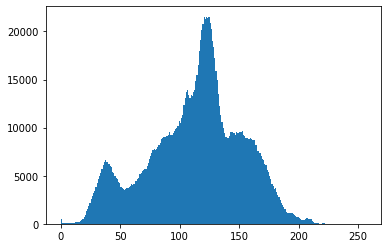

In [192]:
# img = np.full((200,200), 0, np.uint8)
img = cv2.imread("./images/credit_card.jpg", -1)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

# cv2.imshow("image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

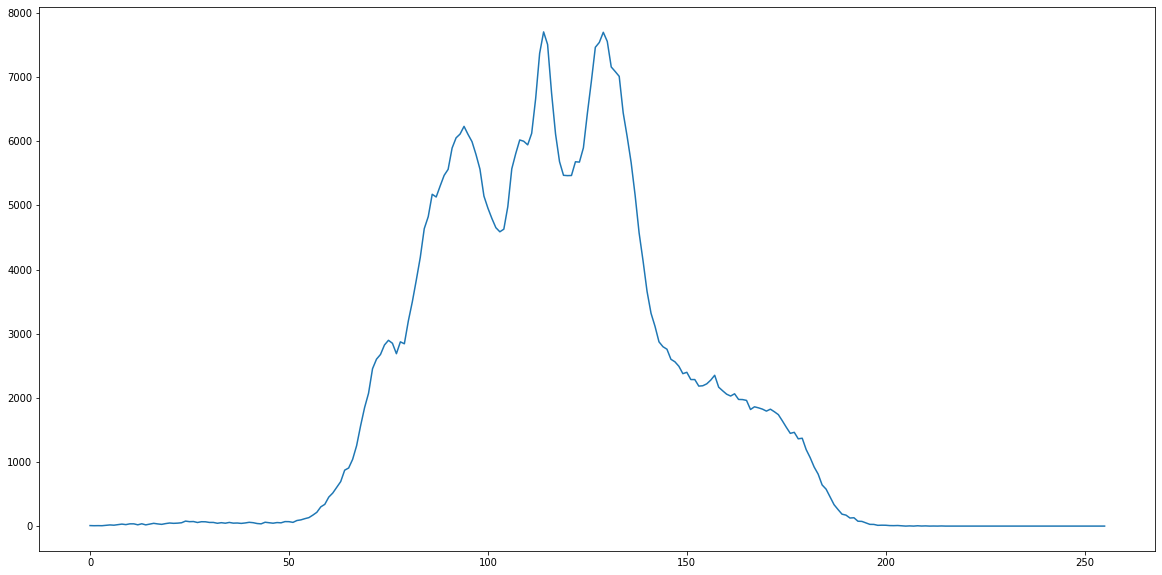

In [210]:
img = cv2.imread("./images/credit_card.jpg", 0)
# b, g, r = cv2.split(img)

# plt.figure(figsize=(20,10))
# plt.hist(b.ravel(), 256, [0,256])
# plt.hist(g.ravel(), 256, [0,256])
# plt.hist(r.ravel(), 256, [0,256])

# plt.show()

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(20,10))
plt.plot(hist)
plt.show()